# Load Data

In [11]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1, size=(6, 4)):
    fig, ax = plt.subplots(rows, columns, figsize=size)
    ax.plot(x, y_true, 'rx', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting')
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("cluster {0}: cost {1}".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()
    
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/indices/index13.pickle")
train_idx = train_idx[9] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts15 = np.arange(15)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data
    
dcp.make_folders("../../Figs/curve_fitting/")

Training data set: (300, 22832)
../../Figs/curve_fitting/ already present - Skipping pickling.


# 1. Single Curve
## 1-1. Two parameters

cluster 1:
 - Curve Fitting Parameters: [-2.67540466  0.10533854]
 - Curve Fitting Cost: 0.8943515086039482



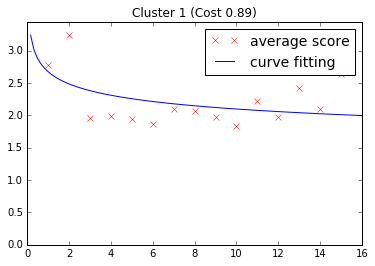

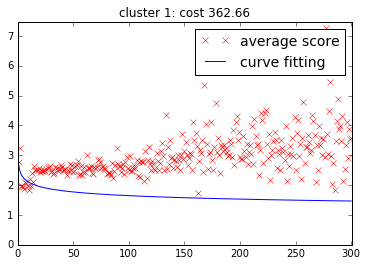

cluster 2:
 - Curve Fitting Parameters: [-1.30768689 -0.20635853]
 - Curve Fitting Cost: 1.1416929454606193



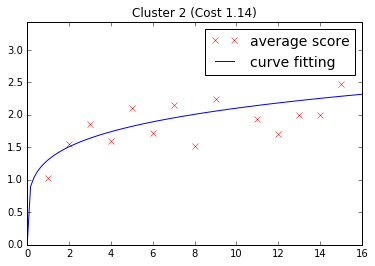

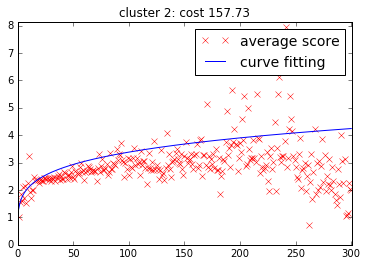

cluster 3:
 - Curve Fitting Parameters: [-3.43500921  0.2530691 ]
 - Curve Fitting Cost: 2.1123623916813288



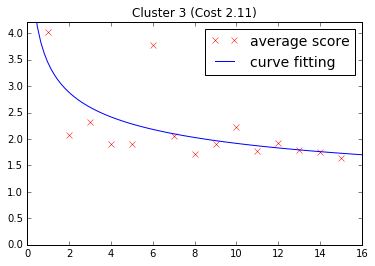

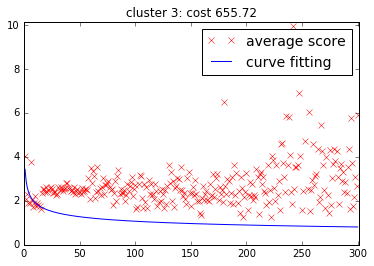

cluster 4:
 - Curve Fitting Parameters: [-1.11941254 -0.23951725]
 - Curve Fitting Cost: 2.3734711605816616



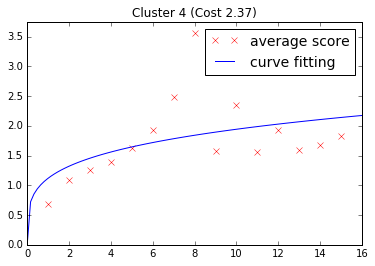

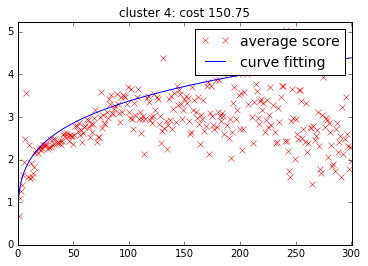

cluster 5:
 - Curve Fitting Parameters: [-1.70464232 -0.0769685 ]
 - Curve Fitting Cost: 1.8334459901965936



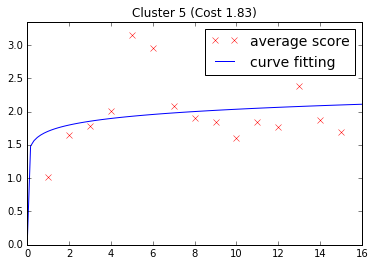

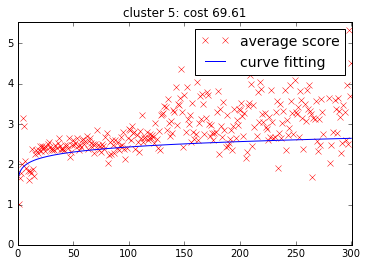

cluster 6:
 - Curve Fitting Parameters: [-0.80093337 -0.38605049]
 - Curve Fitting Cost: 1.667267321634427



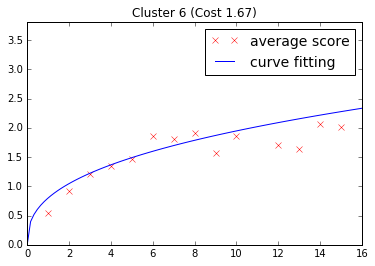

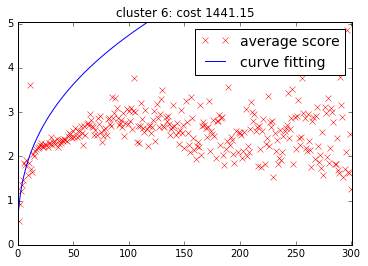

cluster 7:
 - Curve Fitting Parameters: [-0.86082936 -0.36405533]
 - Curve Fitting Cost: 2.3470496834572194



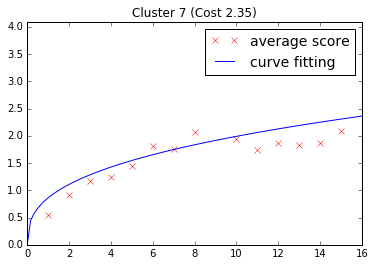

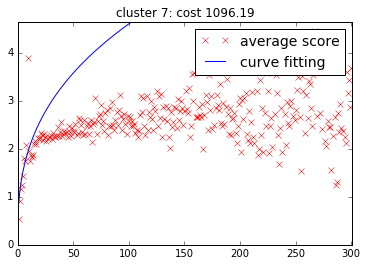

cluster 8:
 - Curve Fitting Parameters: [-1.81225404 -0.05107221]
 - Curve Fitting Cost: 1.8291250415687839



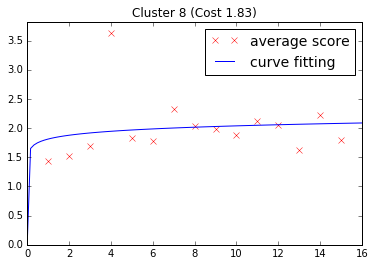

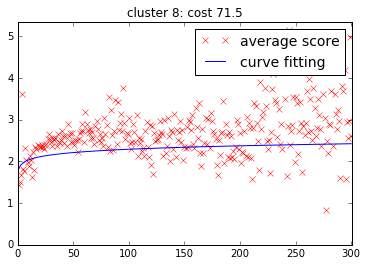

cluster 9:
 - Curve Fitting Parameters: [-0.4625776  -0.63488845]
 - Curve Fitting Cost: 1.690584370029407



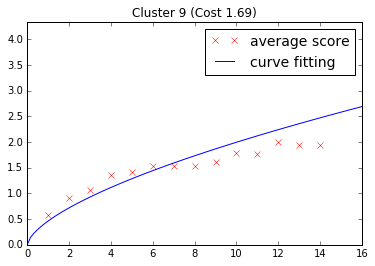

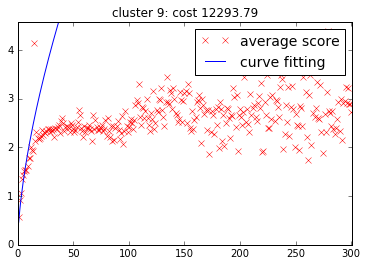

cluster 10:
 - Curve Fitting Parameters: [-1.00361031 -0.3057965 ]
 - Curve Fitting Cost: 2.5065910097143593



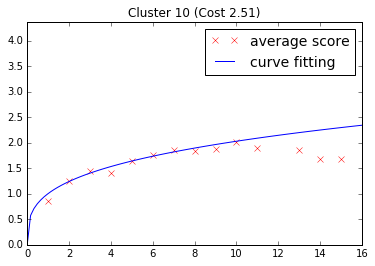

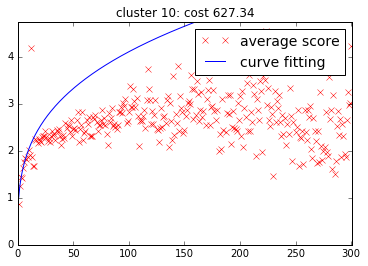

cluster 11:
 - Curve Fitting Parameters: [-0.65100677 -0.47958684]
 - Curve Fitting Cost: 2.1726286723614585



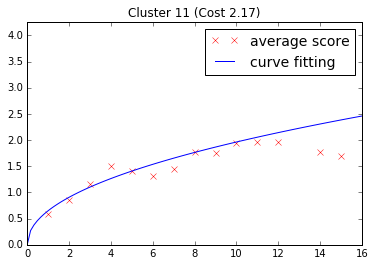

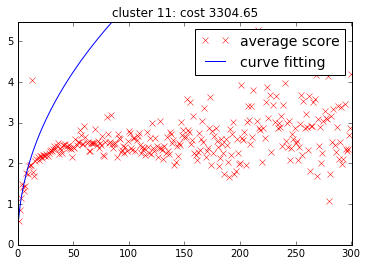

cluster 12:
 - Curve Fitting Parameters: [-2.10568022  0.01284743]
 - Curve Fitting Cost: 3.7319430426280746



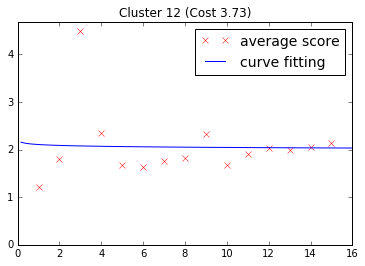

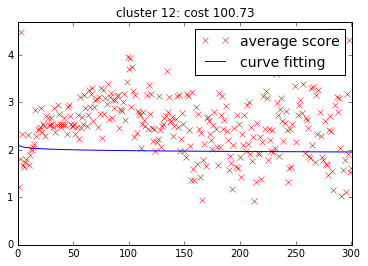

cluster 13:
 - Curve Fitting Parameters: [-0.56475763 -0.54582423]
 - Curve Fitting Cost: 1.8953007571773743



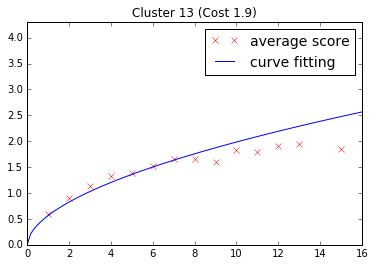

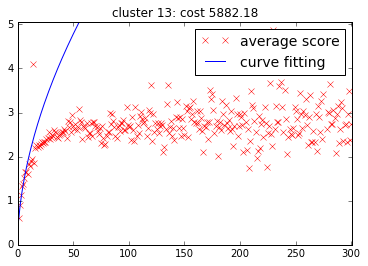

In [7]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw2/single/")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl2_opt, pl2_cost = cv.curve_Fitting(
        cv.powerlaw_least2, cv.powerlaw_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "../../Figs/curve_fitting/powerlaw2/single/{0}".format(i+1), clt_num = i+1)
    
    y_fit = cv.powerlaw_curve2(attempts300, pl2_opt[0], pl2_opt[1])
    pl2_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="../../Figs/curve_fitting/powerlaw2/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = pl2_cost300)

## 1-2. Three parameters

cluster 1:
 - Curve Fitting Parameters: [-0.89668552  1.20331419  2.04620859]
 - Curve Fitting Cost: 0.7690265912388613



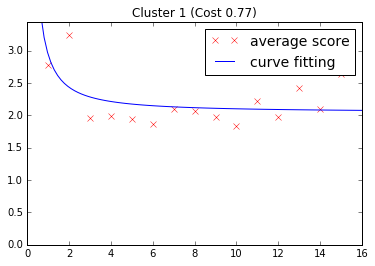

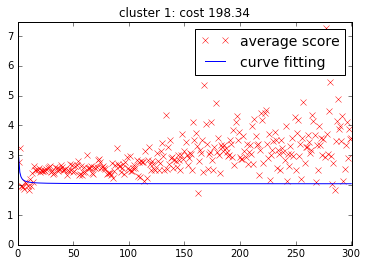

cluster 2:
 - Curve Fitting Parameters: [ 1.4639277   0.57224189  2.50258441]
 - Curve Fitting Cost: 1.0763919469108072



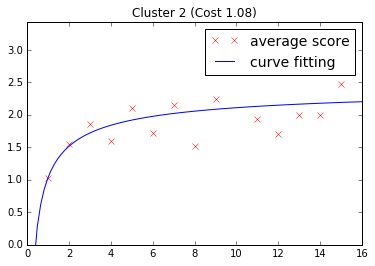

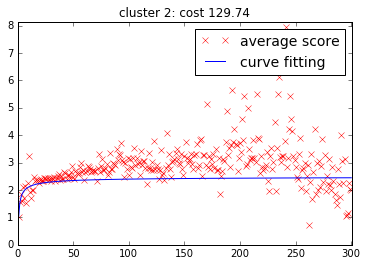

cluster 3:
 - Curve Fitting Parameters: [-1.97450799  3.34611752  2.03926972]
 - Curve Fitting Cost: 1.8319721454848623



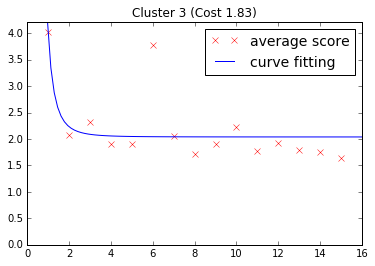

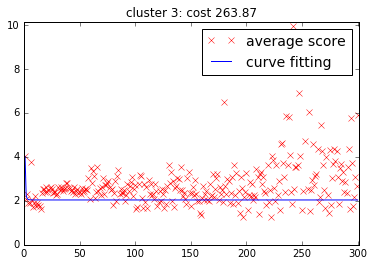

cluster 4:
 - Curve Fitting Parameters: [ 1.65115196  0.84851592  2.20651204]
 - Curve Fitting Cost: 2.049381791948186



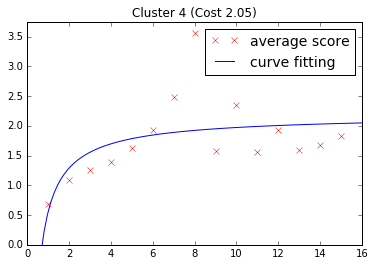

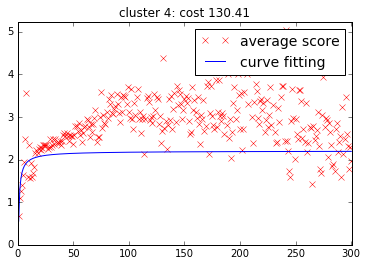

cluster 5:
 - Curve Fitting Parameters: [ 1.07893355  2.41559905  2.06765422]
 - Curve Fitting Cost: 1.4084039037000005



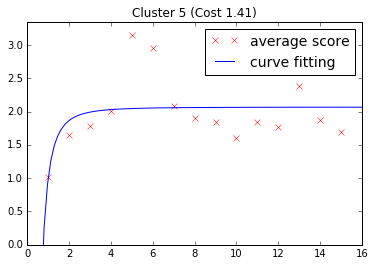

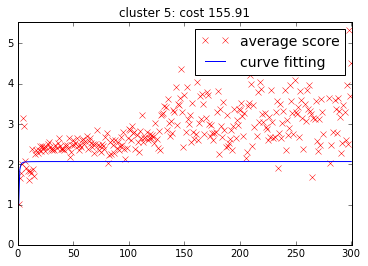

cluster 6:
 - Curve Fitting Parameters: [ 4.38591342  0.18222234  4.85754421]
 - Curve Fitting Cost: 1.5656175367916454



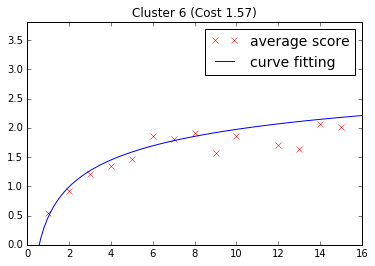

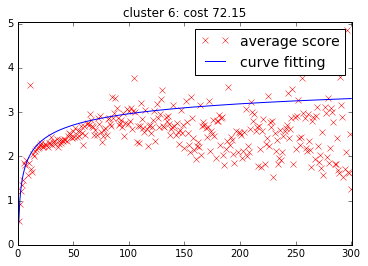

cluster 7:
 - Curve Fitting Parameters: [ 2.91521989  0.35207098  3.32024867]
 - Curve Fitting Cost: 2.141937159417933



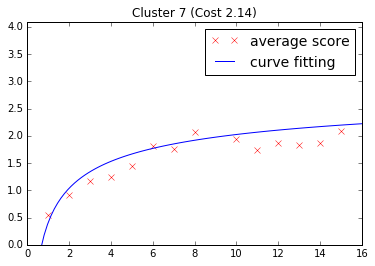

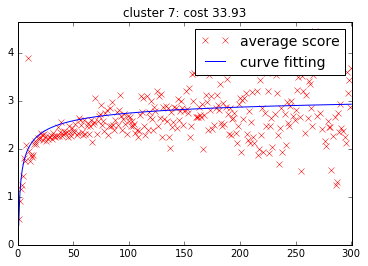

cluster 8:
 - Curve Fitting Parameters: [ 0.67498929  2.10709013  2.06216196]
 - Curve Fitting Cost: 1.6677638555471122



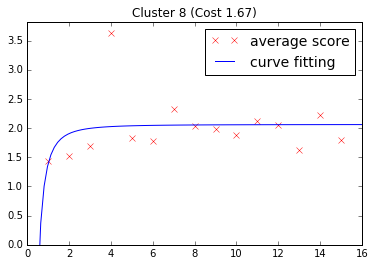

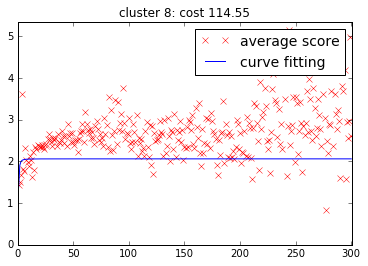

cluster 9:
 - Curve Fitting Parameters: [  3.38908055e+03   2.18785633e-04   3.38937564e+03]
 - Curve Fitting Cost: 2.023712098427536



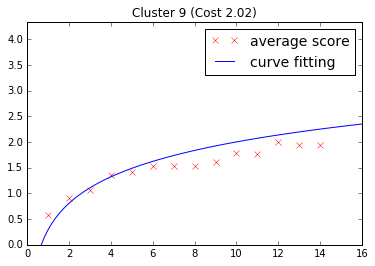

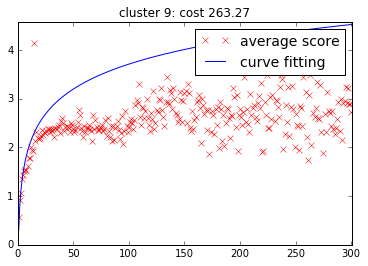

cluster 10:
 - Curve Fitting Parameters: [ 7.07851461  0.0821063   7.90258645]
 - Curve Fitting Cost: 2.4723723174287864



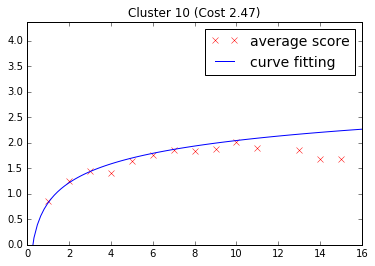

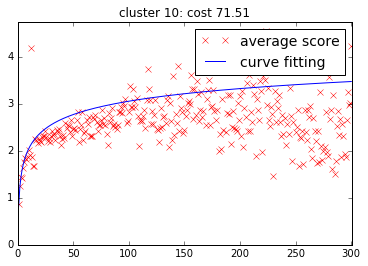

cluster 11:
 - Curve Fitting Parameters: [  1.61616015e+03   4.17598871e-04   1.61658713e+03]
 - Curve Fitting Cost: 2.216597231977876



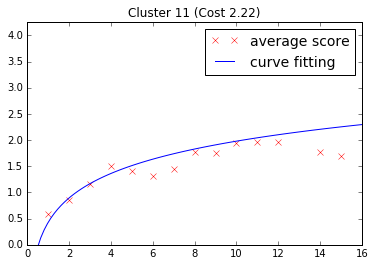

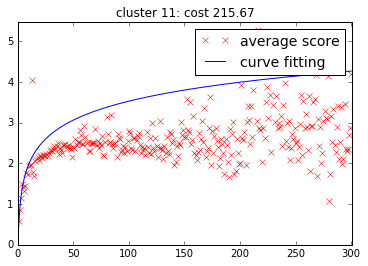

cluster 12:
 - Curve Fitting Parameters: [ 0.90178272  6.26855159  2.11701981]
 - Curve Fitting Cost: 3.356524281596658



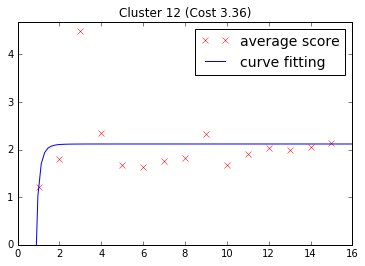

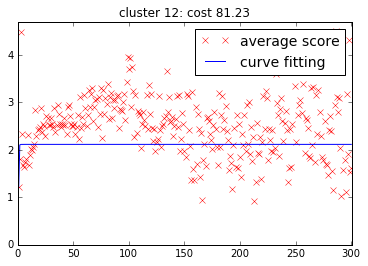

cluster 13:
 - Curve Fitting Parameters: [  2.85985072e+03   2.46901917e-04   2.86021976e+03]
 - Curve Fitting Cost: 2.065145335424361



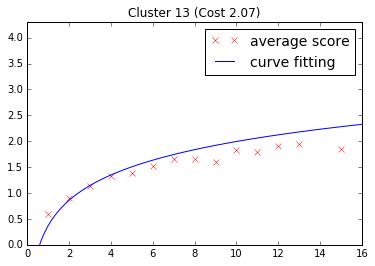

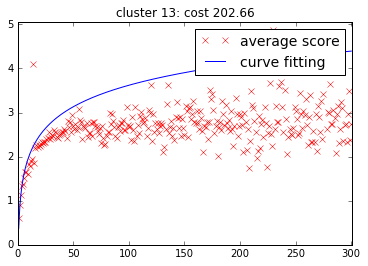

In [9]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw3/single/")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl3_opt, pl3_cost = cv.curve_Fitting(
        cv.powerlaw_least3, cv.powerlaw_curve3, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "../../Figs/curve_fitting/powerlaw3/single/{0}".format(i+1), clt_num = i+1)
    
    y_fit = cv.powerlaw_curve3(attempts300, pl3_opt[0], pl3_opt[1], pl3_opt[2])
    pl3_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="../../Figs/curve_fitting/powerlaw3/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = pl3_cost300)

## 1-3. Four parameters

cluster 1:
 - Curve Fitting Parameters: [  5.89047057e+10   8.44910998e+00   2.18133431e+00   1.72070967e+01]
 - Curve Fitting Cost: 2.1567533655103817



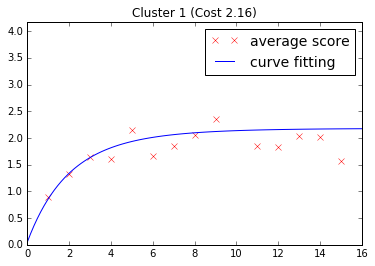

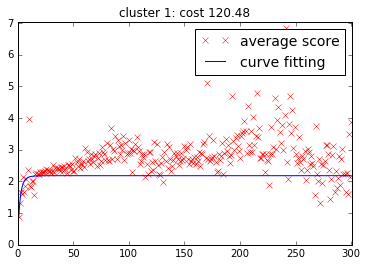

cluster 2:
 - Curve Fitting Parameters: [ 27.71559661   5.48307795   2.11816627   0.93103673]
 - Curve Fitting Cost: 1.992991648464694



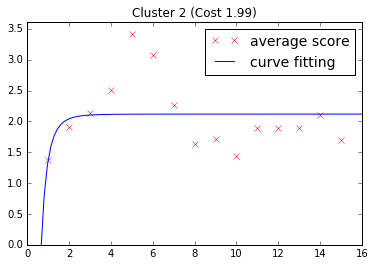

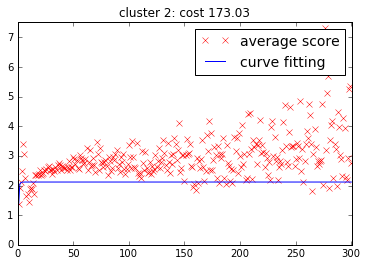

cluster 3:
 - Curve Fitting Parameters: [ 17.58198171   5.71504576   2.10559853   0.90262802]
 - Curve Fitting Cost: 1.1771108236848264



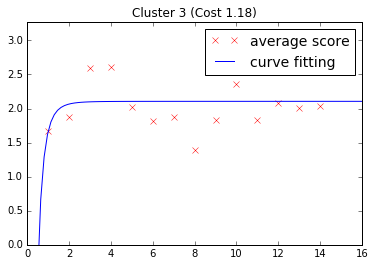

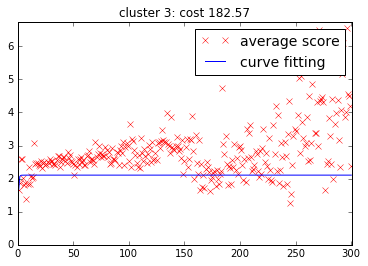

cluster 4:
 - Curve Fitting Parameters: [  5.63418730e+12   1.08107157e+01   2.04301570e+00   1.39339636e+01]
 - Curve Fitting Cost: 2.7892584574033275



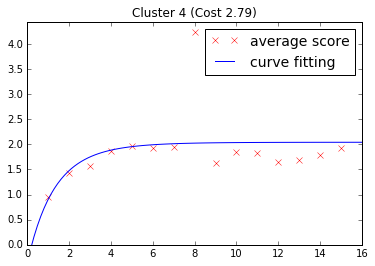

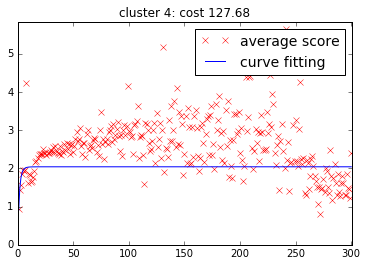

cluster 5:
 - Curve Fitting Parameters: [  1.83660042e+02   6.94896718e-03   1.82275903e+02   3.18277007e+00]
 - Curve Fitting Cost: 1.2765088324559581



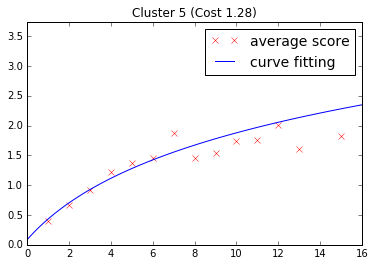

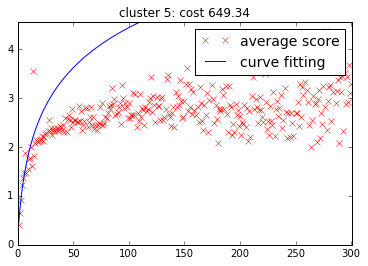

cluster 6:
 - Curve Fitting Parameters: [  7.21898939e+04   3.51811576e+00   2.52907757e+00   1.90816814e+01]
 - Curve Fitting Cost: 1.868257961620554



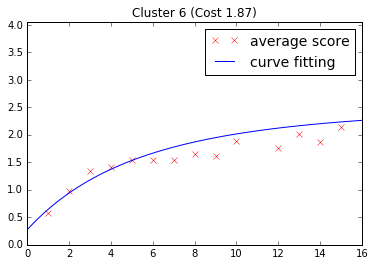

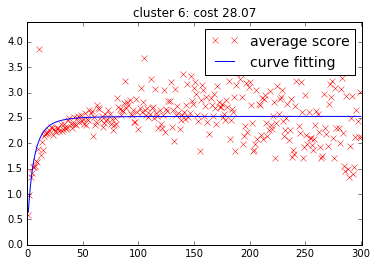

cluster 7:
 - Curve Fitting Parameters: [-1121.55634263     2.98040343     1.89188372    10.64246129]
 - Curve Fitting Cost: 1.543123751160677



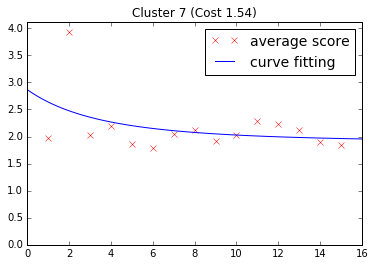

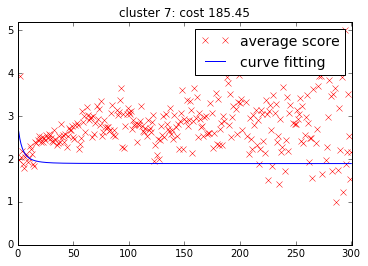

cluster 8:
 - Curve Fitting Parameters: [  4.27167002e+06   4.73445541e+00   2.38156064e+00   2.17714988e+01]
 - Curve Fitting Cost: 2.012494532438276



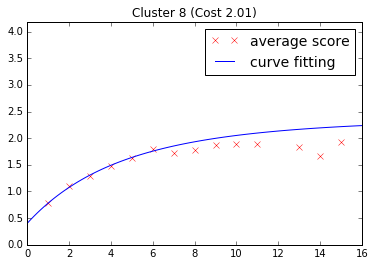

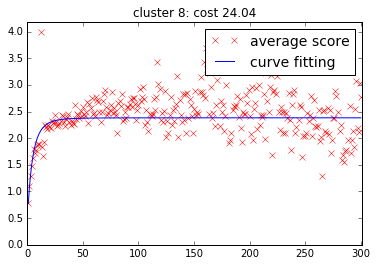

cluster 9:
 - Curve Fitting Parameters: [  8.37984421e+01   1.68742118e-02   8.20740344e+01   5.11838953e+00]
 - Curve Fitting Cost: 1.9293744227797995



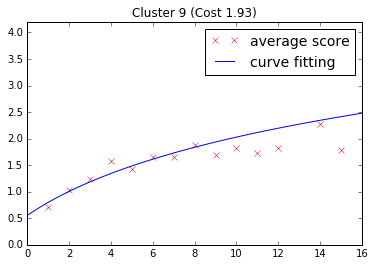

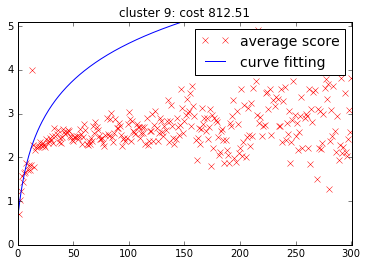

cluster 10:
 - Curve Fitting Parameters: [  7.96984000e+12   1.02672352e+01   2.02433476e+00   1.64691233e+01]
 - Curve Fitting Cost: 1.1247198189986853



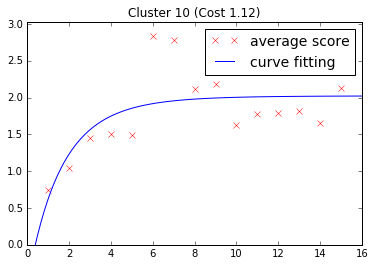

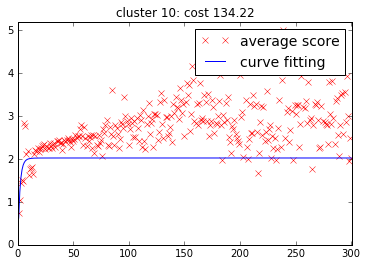

cluster 11:
 - Curve Fitting Parameters: [  5.89162406e+10   8.25942555e+00   2.13678950e+00   1.84868762e+01]
 - Curve Fitting Cost: 2.918964701594609



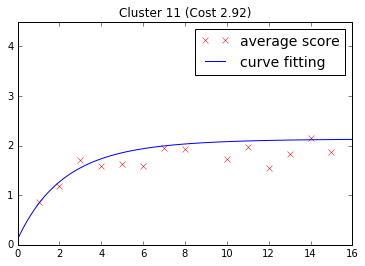

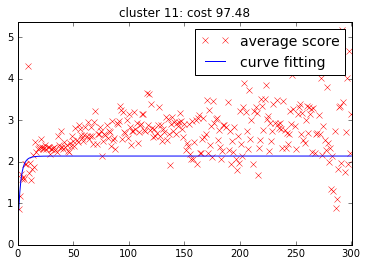

cluster 12:
 - Curve Fitting Parameters: [ -2.05496528e-05   6.77404232e+00   2.01811798e+00  -8.24584315e-01]
 - Curve Fitting Cost: 0.0688319151195236



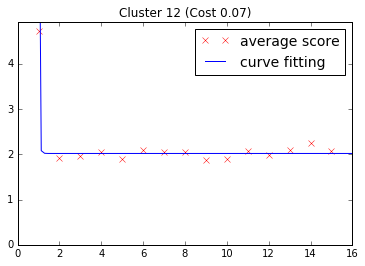

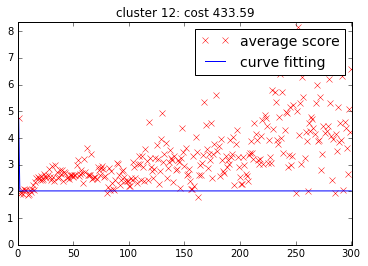

cluster 13:
 - Curve Fitting Parameters: [  1.72253982e+03   1.46949549e-01   6.61225307e+02   6.79694183e+02]
 - Curve Fitting Cost: 1.885572441905531



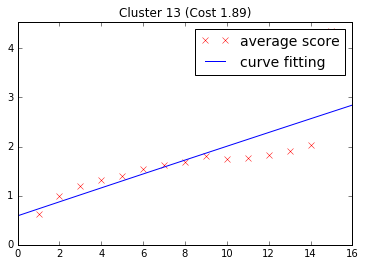

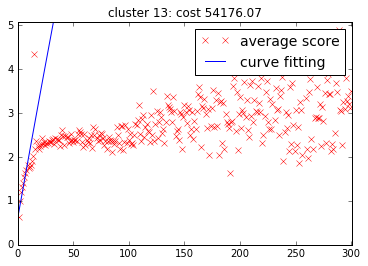

In [12]:
dcp.make_folders("../../Figs/curve_fitting/powerlaw4/single/")

seed = [1, 1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl4_opt, pl4_cost = cv.curve_Fitting(
        cv.powerlaw_least4, cv.powerlaw_curve4, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "../../Figs/curve_fitting/powerlaw4/single/{0}".format(i+1), clt_num = i+1)
    
    y_fit = cv.powerlaw_curve4(attempts300, pl4_opt[0], pl4_opt[1], pl4_opt[2], pl4_opt[3])
    pl4_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="../../Figs/curve_fitting/powerlaw4/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = pl4_cost300)